# Import Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

# Loading Files

In [2]:
path = 'C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Take-Home Challange/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/'

In [3]:
file1 = open(path+'ultimate_data_challenge.json')
data1 = json.load(file1)
data1[:10]

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [4]:
data1 = pd.DataFrame(data1)
data1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
file2 = open(path+'logins.json')
data2 = json.load(file2)
data2

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

#  Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [6]:
data2 = pd.DataFrame(data2)
data2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
data2['login_time'] = pd.to_datetime(data2['login_time'])
df = data2.resample('15min', on='login_time').count()
df.rename(columns={'login_time':'Login Count'}, inplace=True)
df.head()

,Login Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
df.sort_values(by='login_time')
df.head()

,Login Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


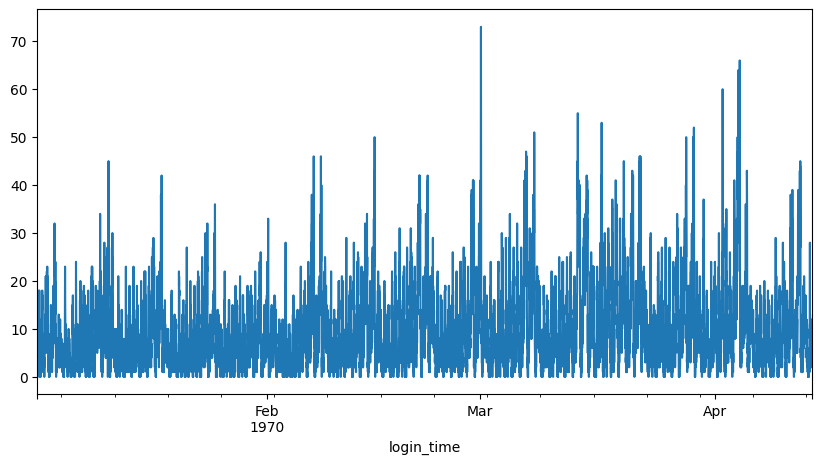

In [9]:
df.plot(figsize=(10,5), legend=False)
plt.show()

In [10]:
dlogs = df.copy()
dlogs['Day of year'] = dlogs.index.dayofyear
dlogs['Day of week number'] = dlogs.index.dayofweek
dlogs['Day of week'] = dlogs['Day of week number'].map({0:"Mon",
                                            1:"Tue",2:"Wed",3:"Thu",
                                            4:"Fri", 5:"Sat", 6:"Sun"})
dlogs.head()

,Login Count,Day of year,Day of week number,Day of week
login_time,,,,
1970-01-01 20:00:00,2,1,3,Thu
1970-01-01 20:15:00,6,1,3,Thu
1970-01-01 20:30:00,9,1,3,Thu
1970-01-01 20:45:00,7,1,3,Thu
1970-01-01 21:00:00,1,1,3,Thu


In [11]:
dlogs['Day of year'].value_counts().sort_index()

1      16
2      96
3      96
4      96
5      96
       ..
99     96
100    96
101    96
102    96
103    76
Name: Day of year, Length: 103, dtype: int64

C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


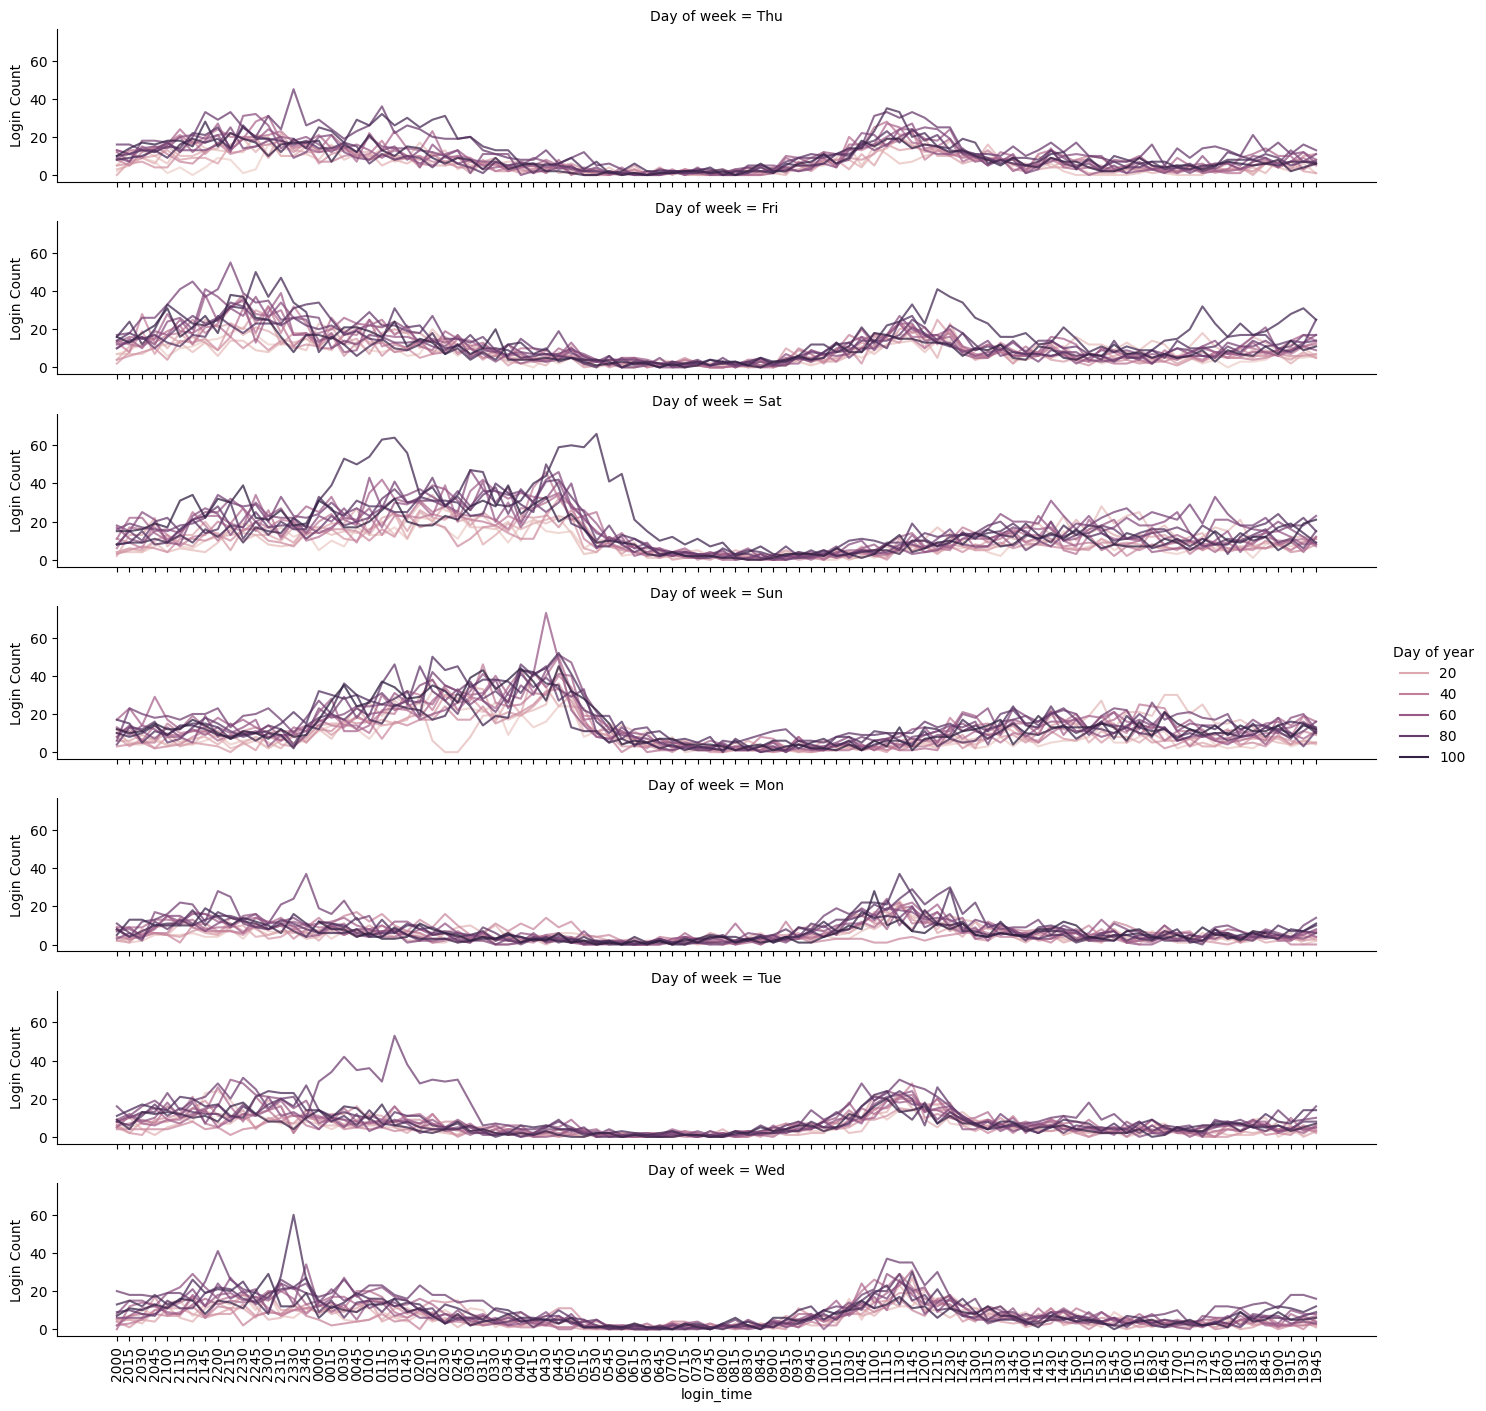

In [12]:
sns.relplot(data=dlogs,
            x=dlogs.index.strftime('%H%M'), 
            y='Login Count', 
            hue='Day of year',
            row='Day of week',
            alpha=0.75, kind='line', ci=None, height=2, aspect=7)
plt.xticks(rotation=90)
plt.show()

C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vinhm\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


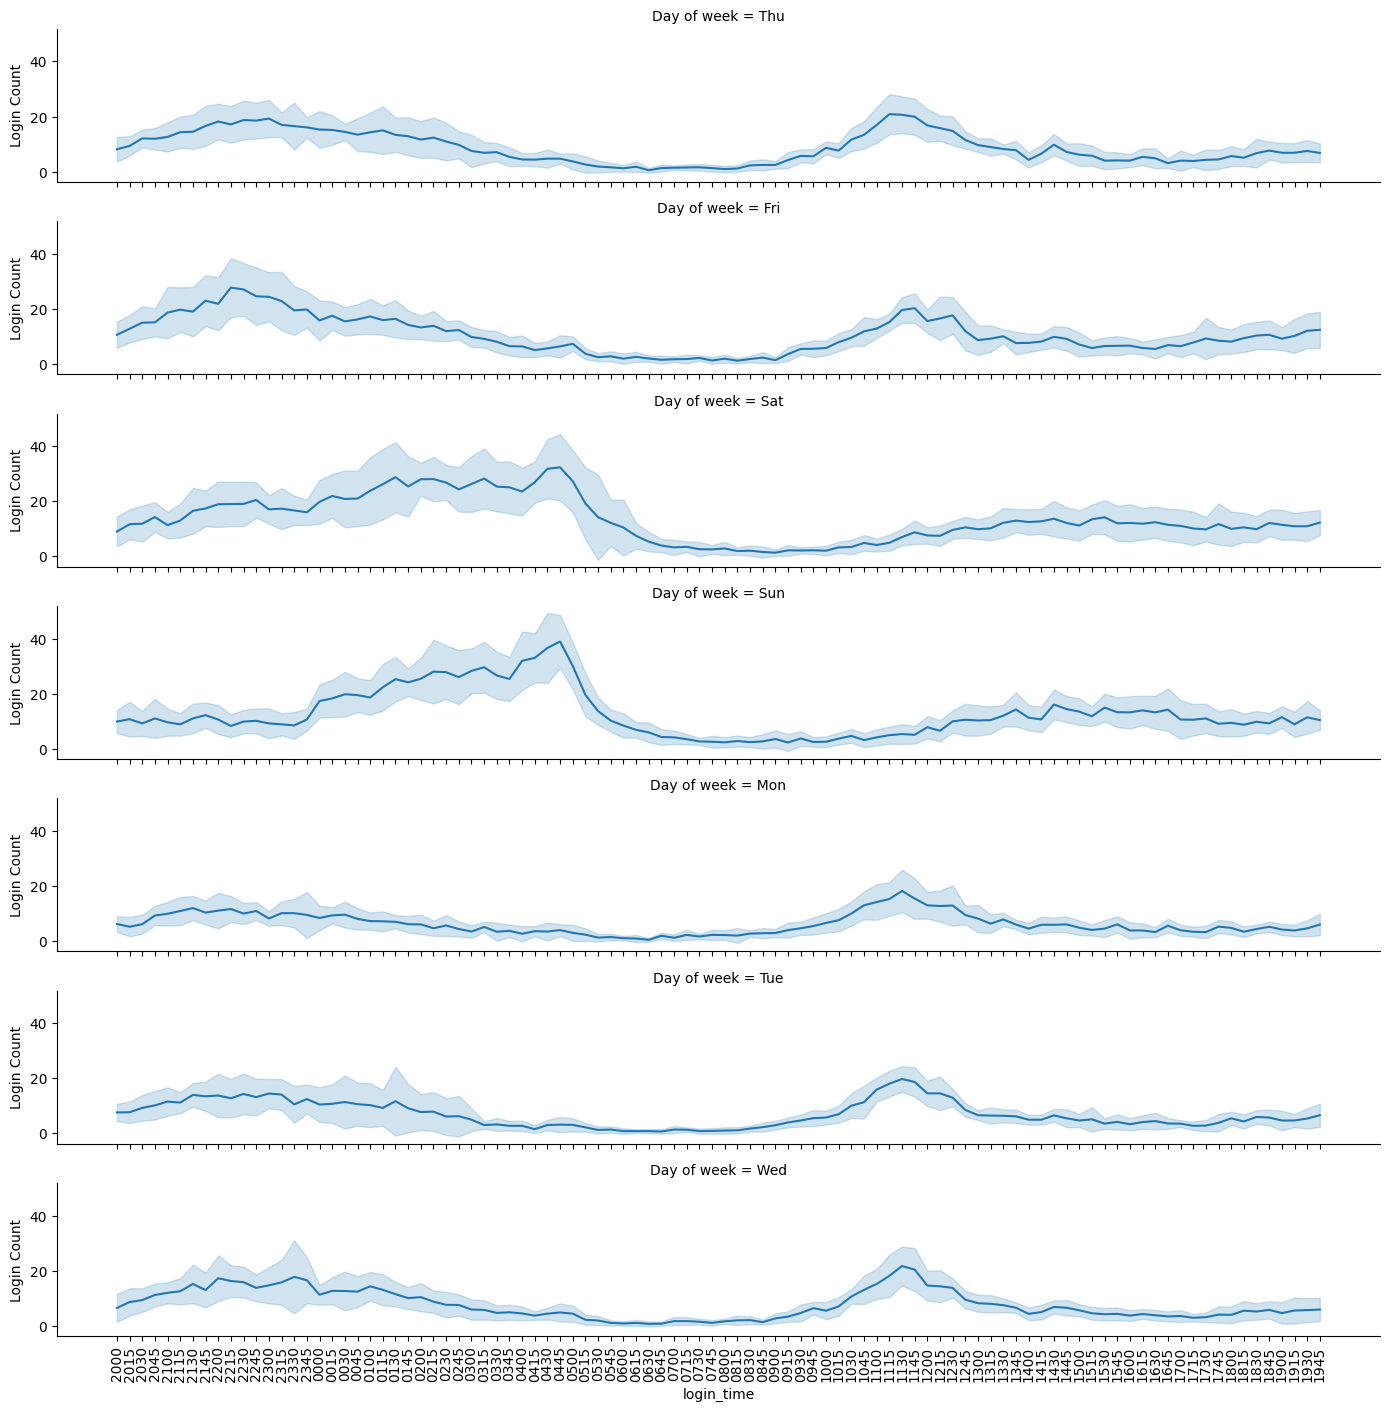

In [13]:
sns.relplot(data=dlogs,
            x=dlogs.index.strftime('%H%M'), 
            y='Login Count', 
            row='Day of week',
            kind='line', estimator='mean', ci='sd', height=2, aspect=7)
plt.xticks(rotation=90)
plt.show()

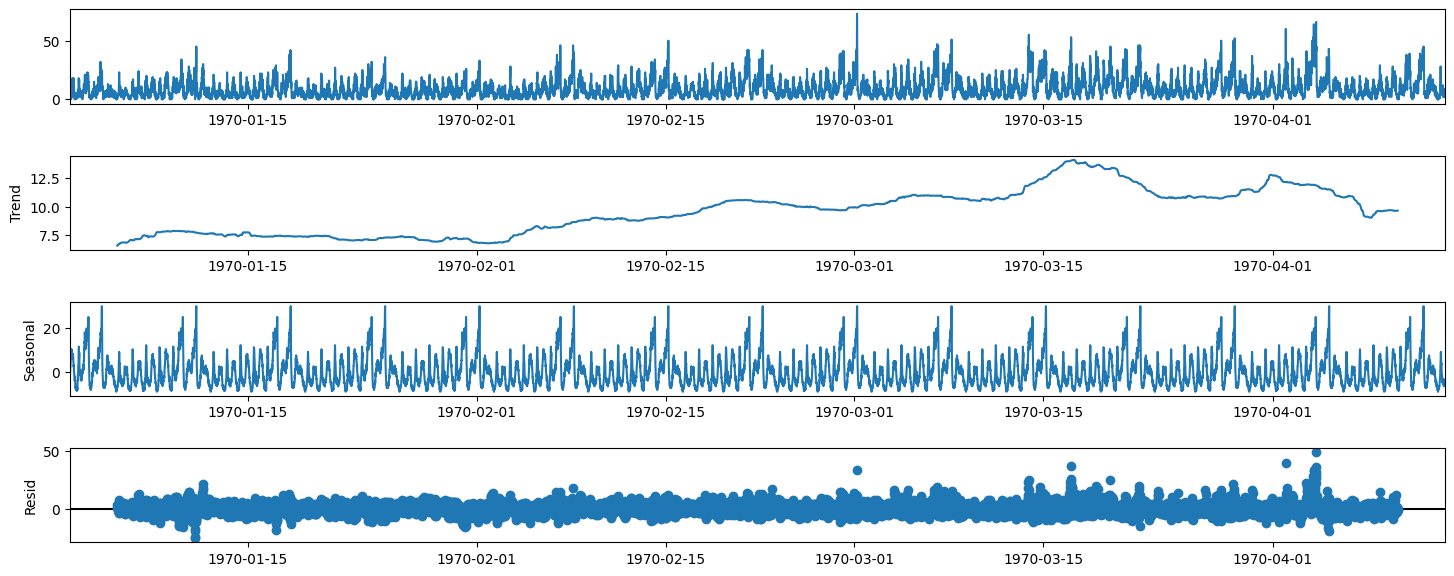

In [14]:
seas = sm.tsa.seasonal_decompose(df, model='add', period=7*4*24)  
fig = seas.plot()
fig.set_figheight(6)
fig.set_figwidth(16)
plt.show()

Weekdays: Monday to Friday have peak logins around 11:30AM, and have secondary peaks around 11:00PM.
Weekends: Have peak activities 9:00PM to 6:00AM.

The months of January and February have lower login trends. From february, the trends start to rise until it peaks in March and slowly drops. 


# Part 2 - Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the observation

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2

1) The best metric of success would have drivers spending as close to equal amounts of time in each city. This would indicate that both cities are being served.

2) A trial phase prior to the reimbursement program goes into effect for each driver can provide a baseline in which to measure the effectiveness of the program. The optimal length of the trial phase should be tested with test groups. An ANOVA model can be used to compare the different test groups. This can be used to compare such parameters as initial and final period of each group, the differences between groups that are reimbursed and not reimbursed, the effect of the length of non-reimbursement. Finding a comparison with a low p-value indicates the statistical significance of the observed difference. The comparison with the lowest p-value will show which changes are most effective and the reimbursement program to be base most off those changes. 

# Part 3 ‐ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [15]:
data1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
#change all necessary columns to datetime
data1['signup_date'] = pd.to_datetime(data1['signup_date'], format='%Y-%m-%d')
data1['last_trip_date'] = pd.to_datetime(data1['last_trip_date'], format='%Y-%m-%d')

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [19]:
for col in data1.columns:
    if data1[col].isnull().sum() > 0:
        print('# of null values in "' + col + '" column', ": ",data1[col].isnull().sum())

# of null values in "avg_rating_of_driver" column :  8122
# of null values in "phone" column :  396
# of null values in "avg_rating_by_driver" column :  201


Users are considered 'Active' if 'last_trip_date' is within the last 30 days, assuming the newest trip is the most recent day.

In [20]:
data1['Active users'] = data1['last_trip_date'] >= (data1['last_trip_date'].max() + pd.to_timedelta(1, unit='d') - pd.to_timedelta(30, unit='d'))
data1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


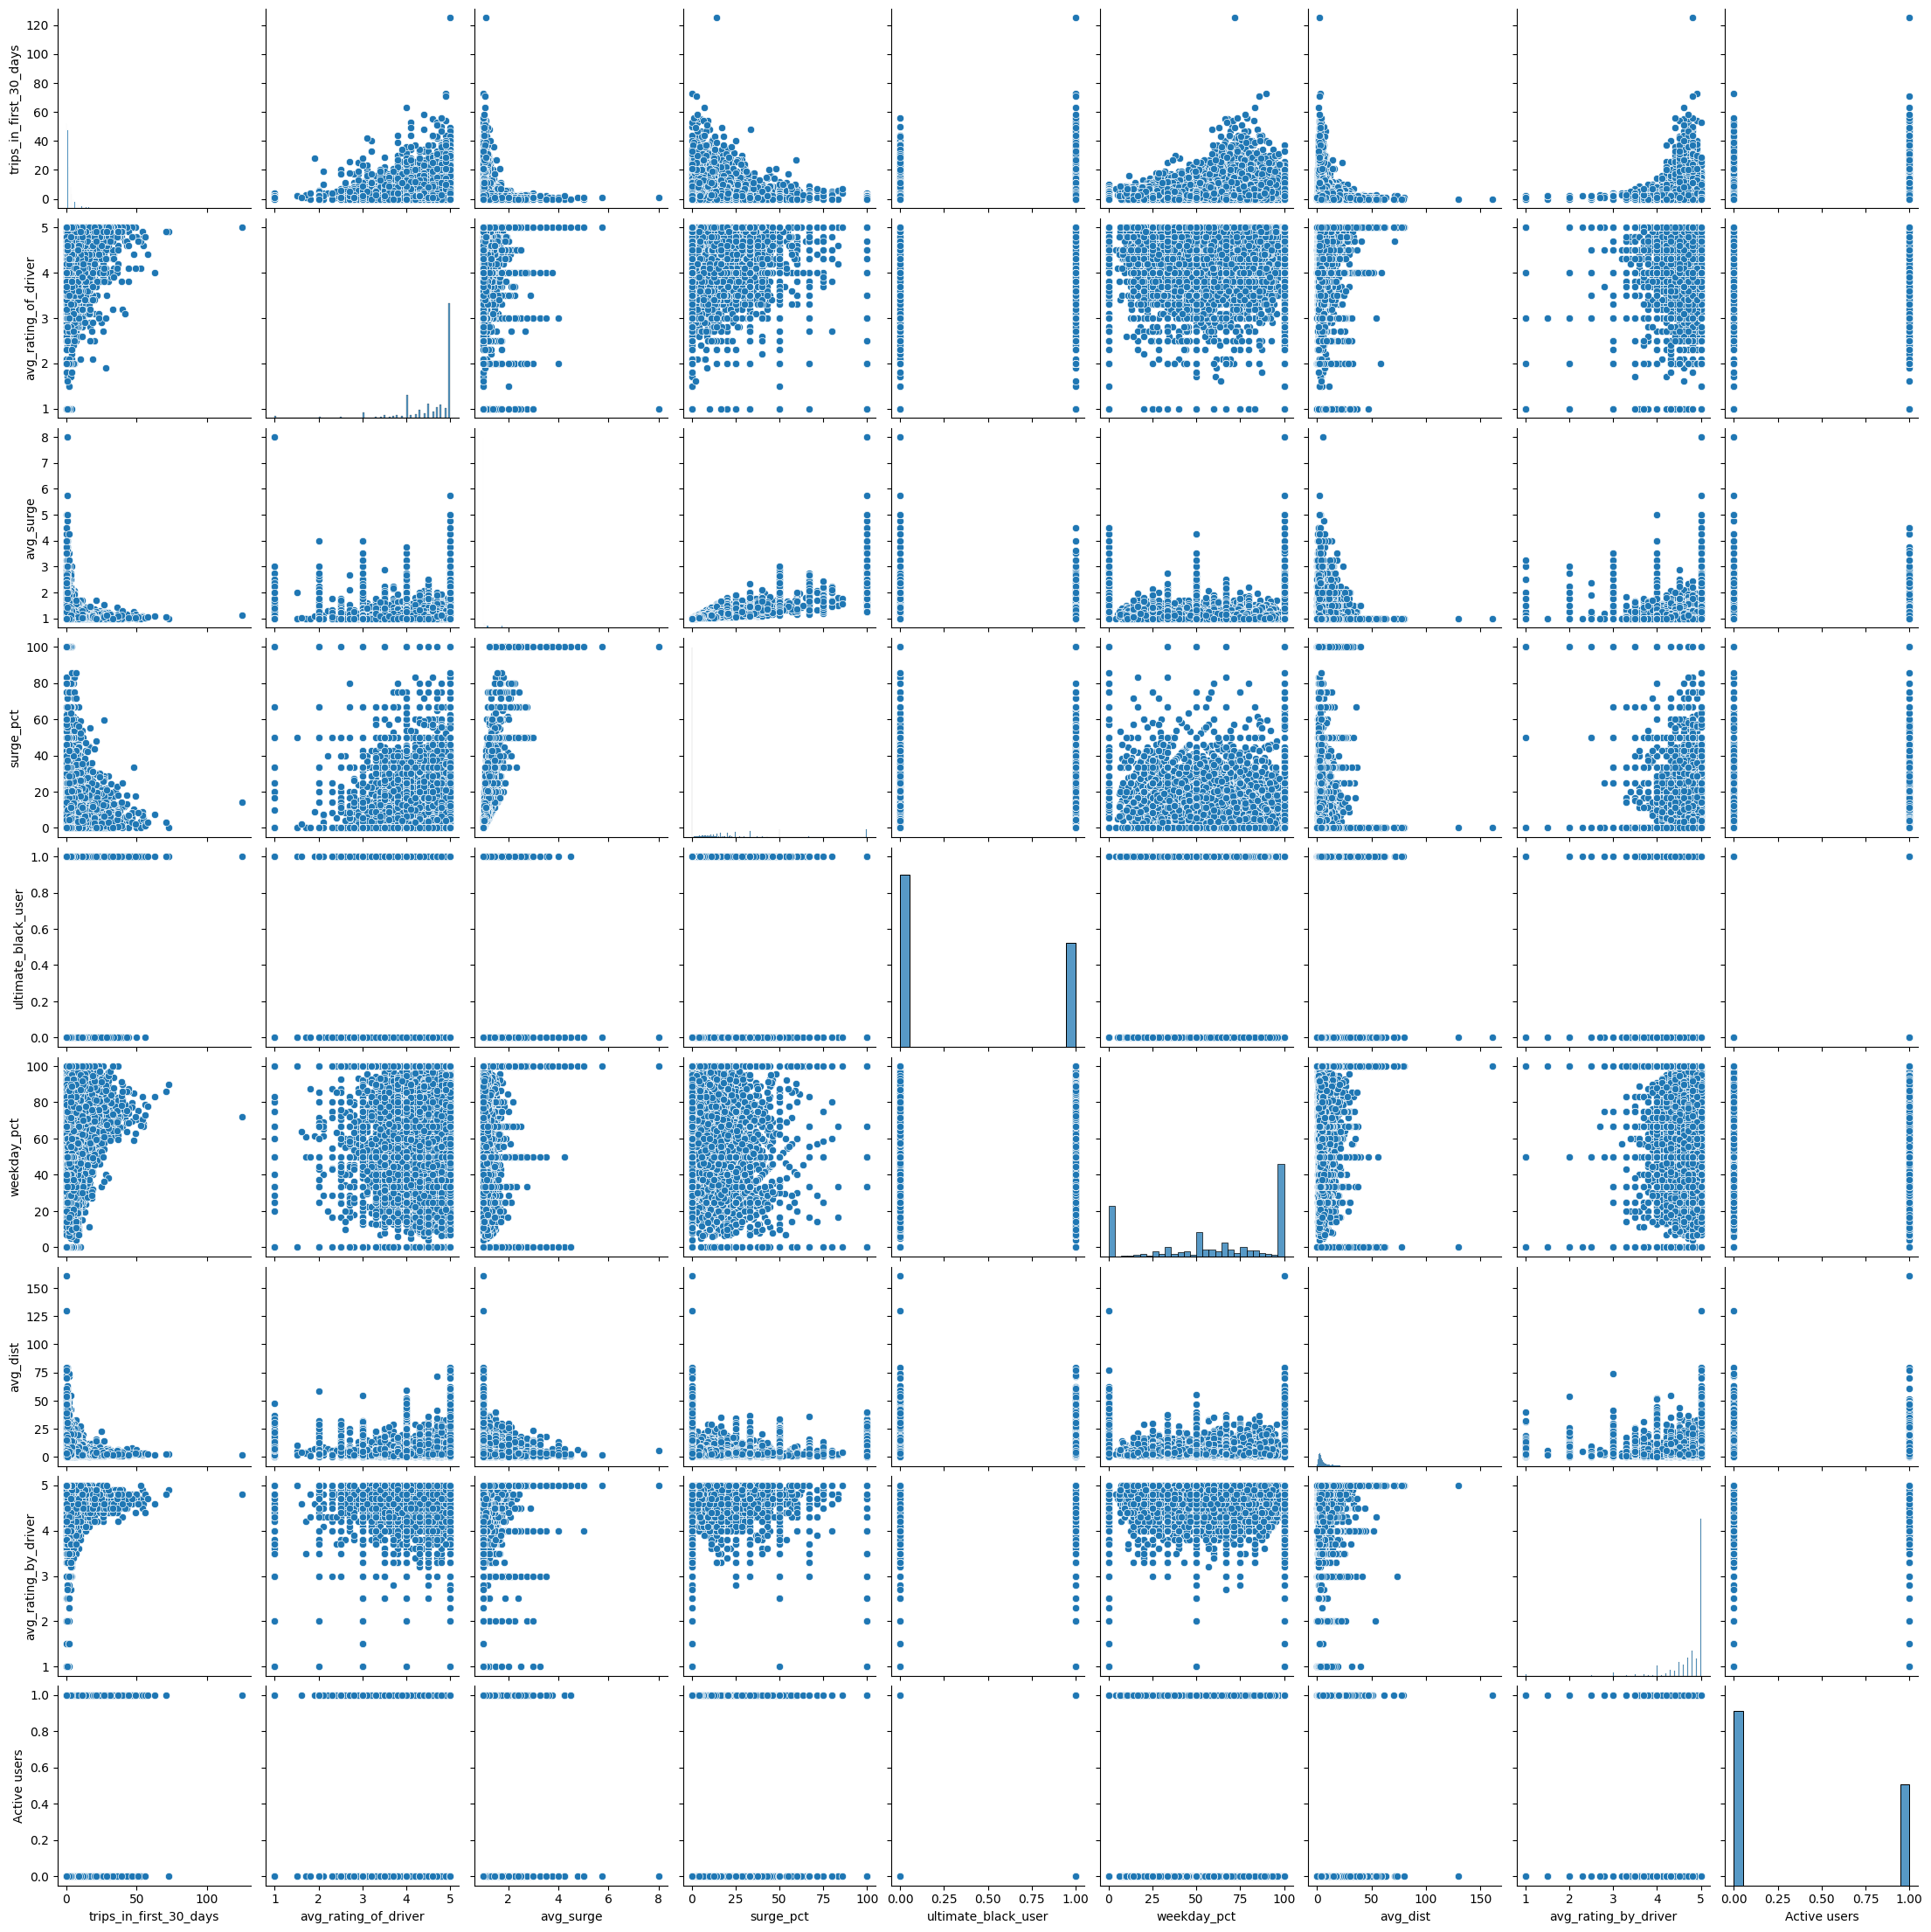

In [21]:
sns.pairplot(data1)

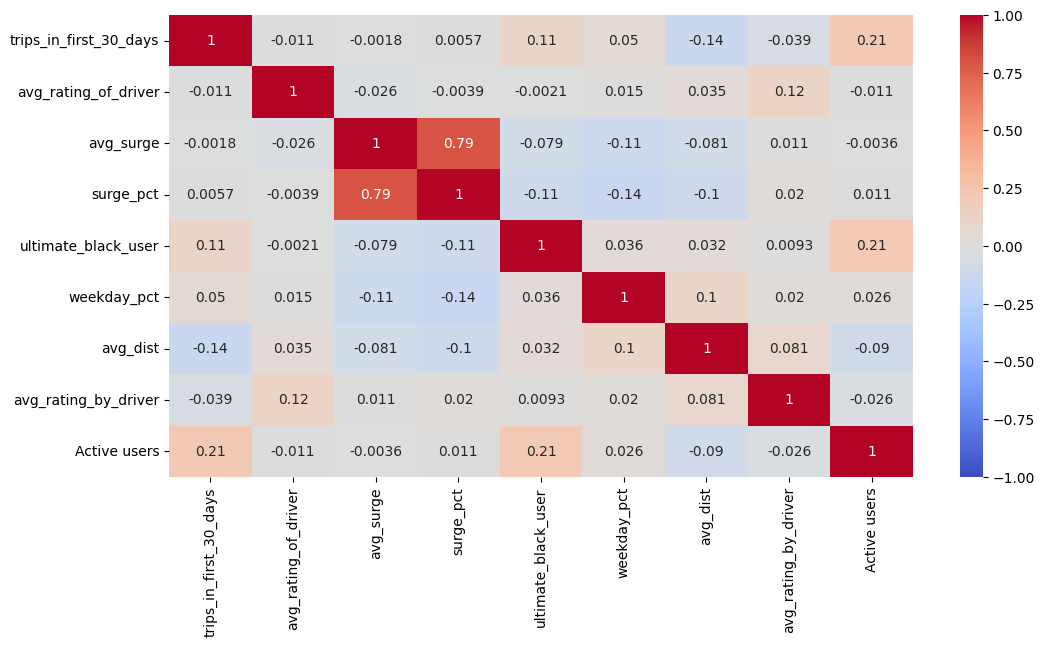

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.heatmap(data1.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
plt.show()

Drop 'avg_rating_of_driver' null values

In [23]:
df2 = data1.drop(['avg_rating_of_driver'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   49604 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    49799 non-null  float64       
 11  Active users            50000 non-null  bool          
dtypes: bool(2), datetime64[ns](2), float64(5), int

One-hot encoding and drop 'city' and 'phone' columns. 

In [24]:
df2 = pd.concat([df2, pd.get_dummies(df2.city, drop_first=True)], axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2.phone, drop_first=False)], axis=1)  
df2 = df2.drop(['city', 'phone'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_surge               50000 non-null  float64       
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   surge_pct               50000 non-null  float64       
 5   ultimate_black_user     50000 non-null  bool          
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    49799 non-null  float64       
 9   Active users            50000 non-null  bool          
 10  King's Landing          50000 non-null  uint8         
 11  Winterfell              50000 non-null  uint8         
 12  Android                 50000 non-null  uint8 

In [25]:
df2.signup_date.min()

Timestamp('2014-01-01 00:00:00')

In [26]:
df2.signup_date.min().dayofyear

1

In [27]:
df2.signup_date.max()

Timestamp('2014-01-31 00:00:00')

In [28]:
df2.signup_date.max().dayofyear

31

In [29]:
df2['signup_doy'] = data1['signup_date'].dt.dayofyear
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_surge               50000 non-null  float64       
 3   last_trip_date          50000 non-null  datetime64[ns]
 4   surge_pct               50000 non-null  float64       
 5   ultimate_black_user     50000 non-null  bool          
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    49799 non-null  float64       
 9   Active users            50000 non-null  bool          
 10  King's Landing          50000 non-null  uint8         
 11  Winterfell              50000 non-null  uint8         
 12  Android                 50000 non-null  uint8 

In [30]:
df2 = df2.drop('signup_date', axis=1)
df2.head()

,trips_in_first_30_days,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active users,King's Landing,Winterfell,Android,iPhone,signup_doy
0,4,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,True,1,0,0,1,25
1,0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,False,0,0,1,0,29
2,3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,False,0,0,0,1,6
3,9,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,True,1,0,0,1,10
4,14,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,0,1,1,0,27


In [31]:
df2 = df2.drop('last_trip_date', axis=1)
df2.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active users,King's Landing,Winterfell,Android,iPhone,signup_doy
0,4,1.10,15.4,True,46.2,3.67,5.0,True,1,0,0,1,25
1,0,1.00,0.0,False,50.0,8.26,5.0,False,0,0,1,0,29
2,3,1.00,0.0,False,100.0,0.77,5.0,False,0,0,0,1,6
3,9,1.14,20.0,True,80.0,2.36,4.9,True,1,0,0,1,10
4,14,1.19,11.8,False,82.4,3.13,4.9,False,0,1,1,0,27


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_surge               50000 non-null  float64
 2   surge_pct               50000 non-null  float64
 3   ultimate_black_user     50000 non-null  bool   
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    49799 non-null  float64
 7   Active users            50000 non-null  bool   
 8   King's Landing          50000 non-null  uint8  
 9   Winterfell              50000 non-null  uint8  
 10  Android                 50000 non-null  uint8  
 11  iPhone                  50000 non-null  uint8  
 12  signup_doy              50000 non-null  int64  
dtypes: bool(2), float64(5), int64(2), uint8(4)
memory usage: 3.0 MB


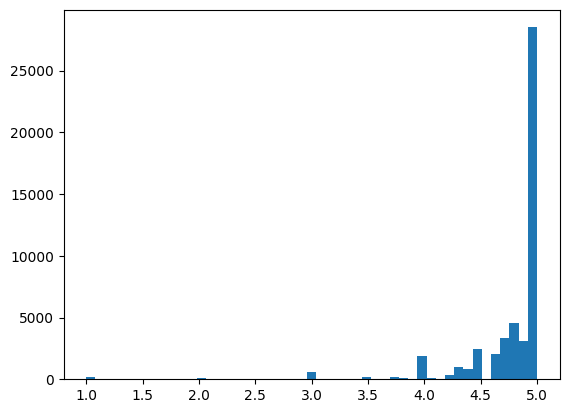

In [33]:
plt.hist(df2.avg_rating_by_driver, bins=49)
plt.show()

In [34]:
print(df2.avg_rating_by_driver.mean())
print(df2.avg_rating_by_driver.median())

4.77815819594771
5.0


In [35]:
# impute mean
df2.avg_rating_by_driver.fillna(df2.avg_rating_by_driver.mean(), axis=0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_surge               50000 non-null  float64
 2   surge_pct               50000 non-null  float64
 3   ultimate_black_user     50000 non-null  bool   
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
 7   Active users            50000 non-null  bool   
 8   King's Landing          50000 non-null  uint8  
 9   Winterfell              50000 non-null  uint8  
 10  Android                 50000 non-null  uint8  
 11  iPhone                  50000 non-null  uint8  
 12  signup_doy              50000 non-null  int64  
dtypes: bool(2), float64(5), int64(2), uint8(4)
memory usage: 3.0 MB


In [36]:
y = df2['Active users']
print(y.head())

0     True
1    False
2    False
3     True
4    False
Name: Active users, dtype: bool


In [37]:
y.value_counts()

False    31690
True     18310
Name: Active users, dtype: int64

In [38]:
y.value_counts()/y.count()

False    0.6338
True     0.3662
Name: Active users, dtype: float64

In [39]:
X = df2[["trips_in_first_30_days", "avg_surge", "surge_pct", "ultimate_black_user", "weekday_pct", "avg_dist", 
        "avg_rating_by_driver", "King's Landing", "Winterfell", "Android", "iPhone", "signup_doy"]]
print(X.head())

   trips_in_first_30_days  avg_surge  surge_pct  ultimate_black_user  \
0                       4       1.10       15.4                 True   
1                       0       1.00        0.0                False   
2                       3       1.00        0.0                False   
3                       9       1.14       20.0                 True   
4                      14       1.19       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  King's Landing  Winterfell  \
0         46.2      3.67                   5.0               1           0   
1         50.0      8.26                   5.0               0           0   
2        100.0      0.77                   5.0               0           0   
3         80.0      2.36                   4.9               1           0   
4         82.4      3.13                   4.9               0           1   

   Android  iPhone  signup_doy  
0        0       1          25  
1        1       0          29  

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
steps_lr = [('scaler', StandardScaler()),('pca', PCA()),('est', LogisticRegression())]
steps_svc = [('scaler', StandardScaler()), ('nystroem', Nystroem()), ('est', SGDClassifier())]
steps_rf = [('est', RandomForestClassifier())]

pipeline_lr = Pipeline(steps_lr)
pipeline_svc = Pipeline(steps_svc)
pipeline_rf = Pipeline(steps_rf)

In [42]:
params_lr = {'est__C':[0.01, 0.1, 1, 10], 'pca__n_components':[None,2, 4, 10]}
params_svc = {'nystroem__n_components':[100, 500, 1000, 2000]}
params_rf = {'est__n_estimators':[4,9,16,25,36, 49,64,81,100,250, 500,1000]}

In [43]:
for pipe, params, name in zip([pipeline_lr, pipeline_svc, pipeline_rf],
                             [params_lr, params_svc, params_rf],
                             ["LogisticRegression", "SVC", "RandomForest"]):
    gs_cv = GridSearchCV(pipe, params, cv=5, scoring='roc_auc')
    gs_cv.fit(X_train, y_train)
    print(name)
    print("gs_cv.best_params_",gs_cv.best_params_)
    print("gs_cv.best_score_",gs_cv.best_score_)
    print(gs_cv.cv_results_)
    print('\n')

LogisticRegression
gs_cv.best_params_ {'est__C': 0.1, 'pca__n_components': None}
gs_cv.best_score_ 0.7682161063721212
{'mean_fit_time': array([0.04733977, 0.05244455, 0.05604782, 0.03282776, 0.04053435,
       0.05544748, 0.05594821, 0.03472967, 0.04053464, 0.05144424,
       0.05744953, 0.03553061, 0.04573956, 0.05314584, 0.05634837,
       0.03262796]), 'std_fit_time': array([0.02151871, 0.00174503, 0.00207554, 0.00150457, 0.00461924,
       0.0052527 , 0.00091723, 0.0022515 , 0.00251213, 0.00196114,
       0.00058359, 0.0015825 , 0.00665867, 0.00229134, 0.00216067,
       0.00182915]), 'mean_score_time': array([0.00580587, 0.00510468, 0.00500474, 0.00520463, 0.00550523,
       0.00550485, 0.00530443, 0.00570517, 0.00640554, 0.00530443,
       0.00540452, 0.00590515, 0.00590487, 0.00550456, 0.00540462,
       0.00510445]), 'std_score_time': array([0.00060062, 0.00037451, 0.00031658, 0.00040057, 0.00031711,
       0.00031628, 0.00024507, 0.0005102 , 0.0020611 , 0.00024507,
       0.00

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))

accuracy: 0.7738


LogisticRegression
accuracy: 0.722


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


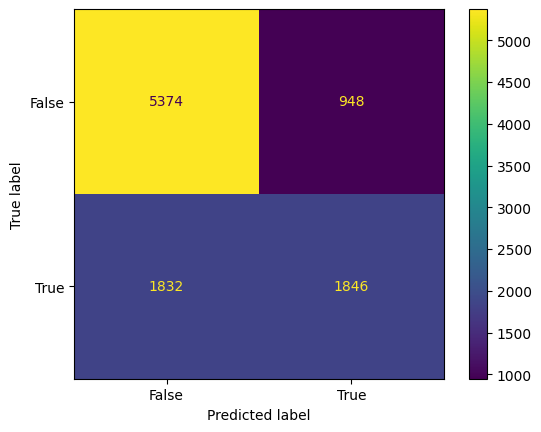

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


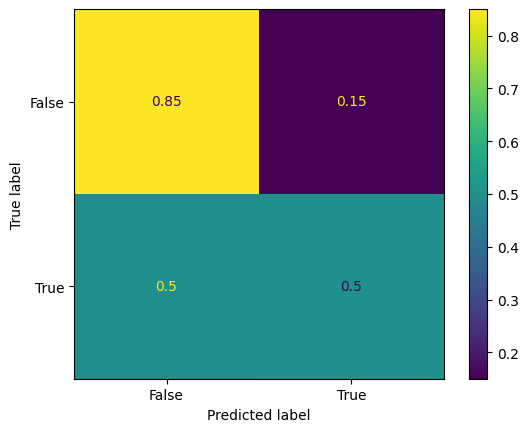



SVC
accuracy: 0.7674


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


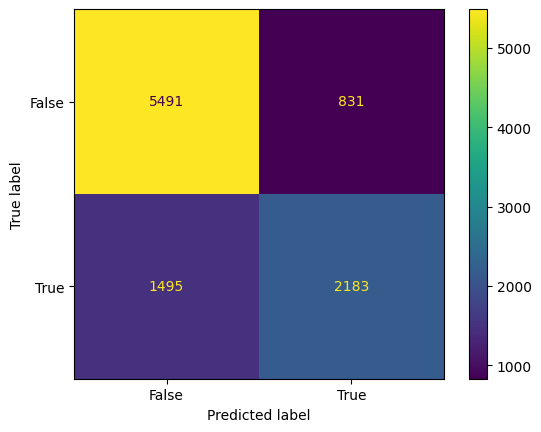

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


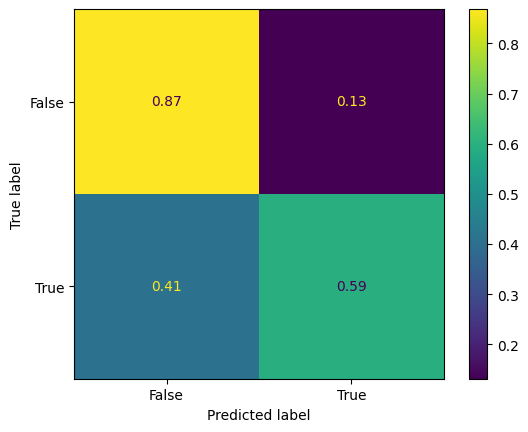



RandomForest
accuracy: 0.7749


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


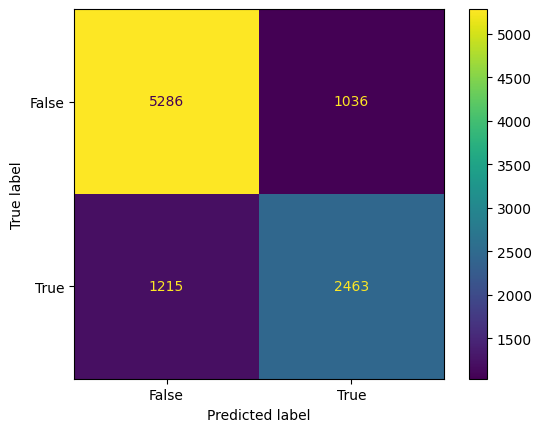

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


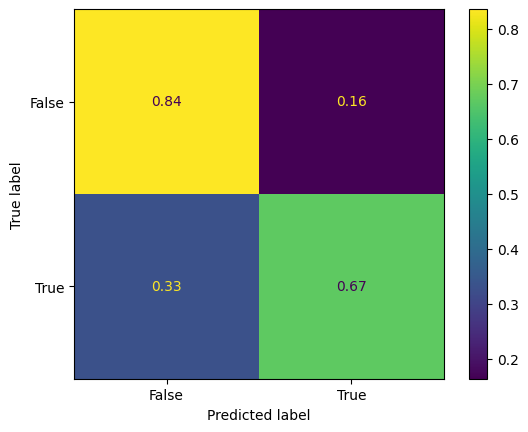

In [45]:
steps_lr_test = [('scaler', StandardScaler()),('pca', PCA(n_components=None)),('est', LogisticRegression(C=0.1))]
steps_svc_test = [('scaler', StandardScaler()), ('nystroem', Nystroem(n_components=2000)), ('est', SGDClassifier())]
steps_rf_test = [('est', RandomForestClassifier(n_estimators=1000))]

pipeline_lr_test = Pipeline(steps_lr_test)
pipeline_svc_test = Pipeline(steps_svc_test)
pipeline_rf_test = Pipeline(steps_rf_test)

for pipe, name in zip([pipeline_lr_test, pipeline_svc_test, pipeline_rf_test],
                             ["LogisticRegression", "SVC", "RandomForest"]):
    
    pipe.fit(X_train, y_train)
    print(name)
    predictions = pipe.predict(X_test)
    print('accuracy:', np.mean(predictions==y_test))
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    plot_confusion_matrix(pipe, X_test, y_test, normalize='true')
    plt.show()
    print('\n')

LogisticRegression
accuracy: 0.722


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


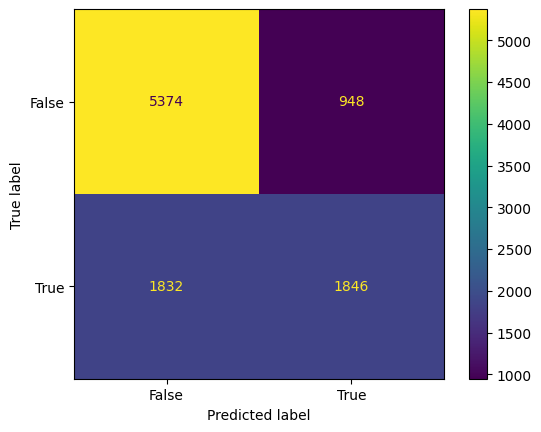

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


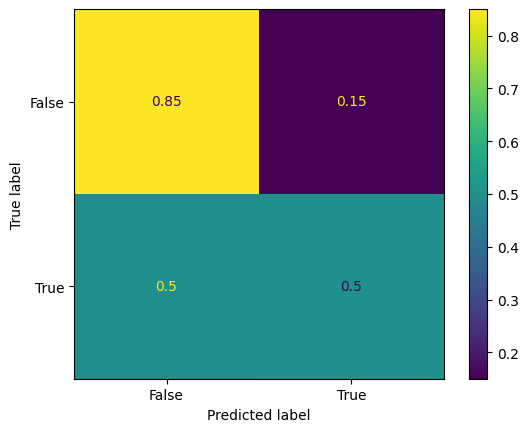



SVC
accuracy: 0.7671


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


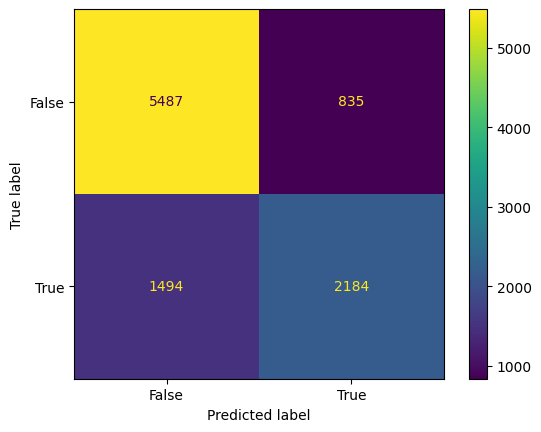

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


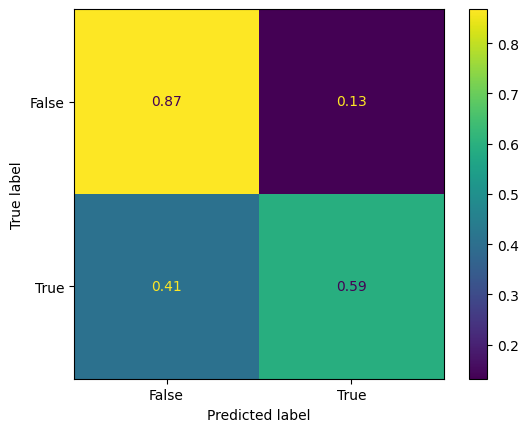



RandomForest
accuracy: 0.7731


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


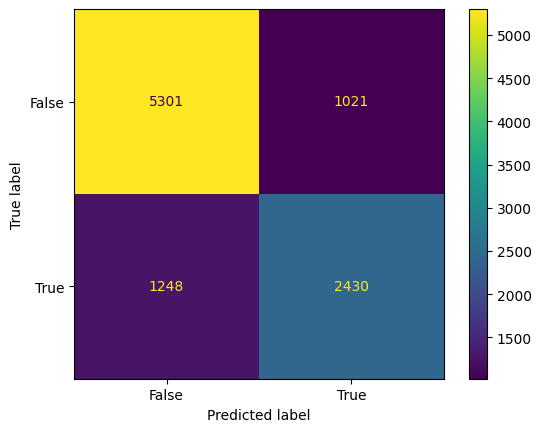

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


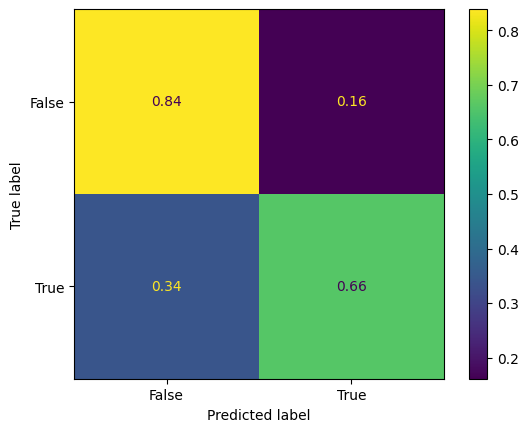



ExtraTrees
accuracy: 0.765


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


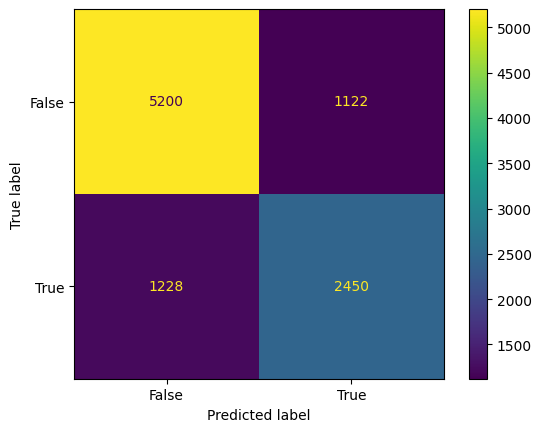

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


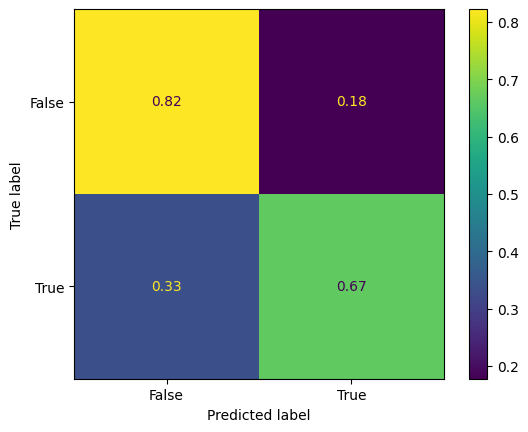



GradientBoostingClassifier
accuracy: 0.791


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


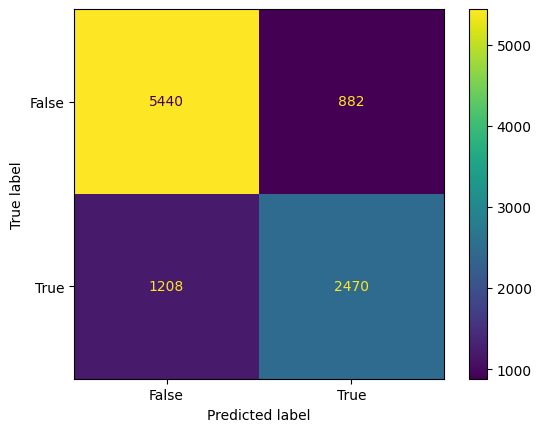

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


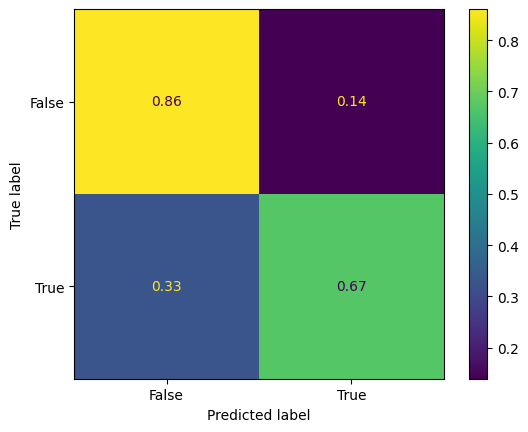

In [46]:
steps_lr_test = [('scaler', StandardScaler()),('pca', PCA(n_components=None)),('est', LogisticRegression(C=0.1))]
steps_svc_test = [('scaler', StandardScaler()), ('nystroem', Nystroem(n_components=500)), ('est', SGDClassifier())]
steps_rf_test = [('est', RandomForestClassifier(n_estimators=100))]


pipeline_lr_test = Pipeline(steps_lr_test)
pipeline_svc_test = Pipeline(steps_svc_test)
pipeline_rf_test = Pipeline(steps_rf_test)

for pipe, name in zip([pipeline_lr_test, pipeline_svc_test, pipeline_rf_test, ExtraTreesClassifier(), 
                      GradientBoostingClassifier()],
                             ["LogisticRegression", "SVC", "RandomForest","ExtraTrees","GradientBoostingClassifier"]):
    
    pipe.fit(X_train, y_train)
    print(name)
    predictions = pipe.predict(X_test)
    print('accuracy:', np.mean(predictions==y_test))
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    plot_confusion_matrix(pipe, X_test, y_test, normalize='true')
    plt.show()
    print('\n')

In [47]:
name='ExtraTreesClassifier'
gs = GridSearchCV(ExtraTreesClassifier(), {'n_estimators':[100]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

ExtraTreesClassifier
gs.best_params_ {'n_estimators': 100}
gs.best_score_ 0.8203409697482407
{'mean_fit_time': array([1.75781088]), 'std_fit_time': array([0.00611771]), 'mean_score_time': array([0.165342]), 'std_score_time': array([0.00074902]), 'param_n_estimators': masked_array(data=[100],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 100}], 'split0_test_score': array([0.81772737]), 'split1_test_score': array([0.82977817]), 'split2_test_score': array([0.81539063]), 'split3_test_score': array([0.82344986]), 'split4_test_score': array([0.81535883]), 'mean_test_score': array([0.82034097]), 'std_test_score': array([0.00556569]), 'rank_test_score': array([1])}




In [48]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['deviance','exponential'], 
                                           'n_estimators':[64,100,144,196,256]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be 

GradientBoostingClassifier
gs.best_params_ {'loss': 'deviance', 'n_estimators': 256}
gs.best_score_ 0.8576433474958615
{'mean_fit_time': array([1.33434687, 2.07608418, 3.00037842, 4.05288339, 5.28604341,
       1.3307435 , 2.07098007, 2.96885166, 4.0278616 , 5.24871097]), 'std_fit_time': array([0.00705309, 0.00353298, 0.0234563 , 0.0070445 , 0.01664266,
       0.00427446, 0.00594357, 0.0099109 , 0.00830994, 0.00855504]), 'mean_score_time': array([0.0106092 , 0.01401215, 0.01771564, 0.02101808, 0.02502174,
       0.01060915, 0.01381145, 0.01721482, 0.02091837, 0.02462139]), 'std_score_time': array([0.00020037, 0.00031643, 0.00024522, 0.00031673, 0.00031628,
       0.00020039, 0.00024565, 0.00024515, 0.00020027, 0.00037483]), 'param_loss': masked_array(data=['deviance', 'deviance', 'deviance', 'deviance',
                   'deviance', 'exponential', 'exponential',
                   'exponential', 'exponential', 'exponential'],
             mask=[False, False, False, False, False, False

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier
accuracy: 0.7966


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


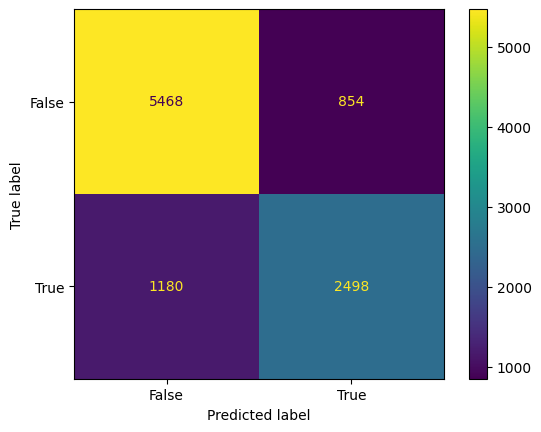

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


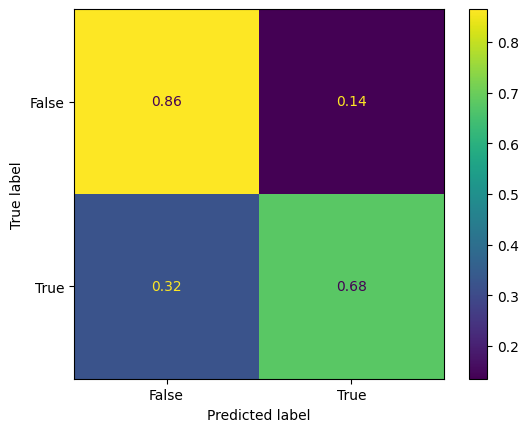

In [49]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [50]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[64,100,144,196,256,512]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 512}
gs.best_score_ 0.8582084967219046
{'mean_fit_time': array([ 1.32553926,  2.0643743 ,  2.97125397,  4.02726159,  5.2520143 ,
       10.47069988]), 'std_fit_time': array([0.00334087, 0.00289018, 0.00490937, 0.01133503, 0.01520193,
       0.03110689]), 'mean_score_time': array([0.010709  , 0.01381178, 0.01721468, 0.02061753, 0.02462096,
       0.03953404]), 'std_score_time': array([0.00040009, 0.00024505, 0.00024517, 0.00020001, 0.0003743 ,
       0.00054825]), 'param_loss': masked_array(data=['exponential', 'exponential', 'exponential',
                   'exponential', 'exponential', 'exponential'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[64, 100, 144, 196, 256, 512],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [

GradientBoostingClassifier
accuracy: 0.7958


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


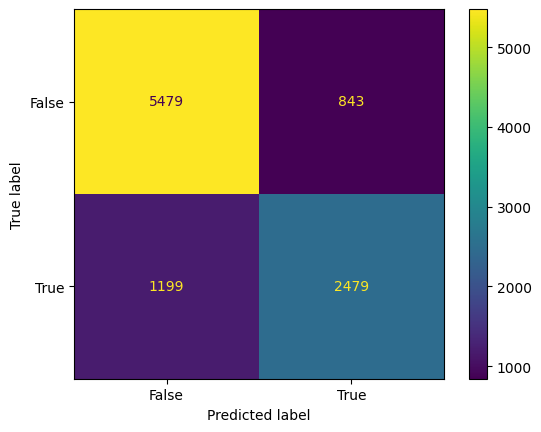

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


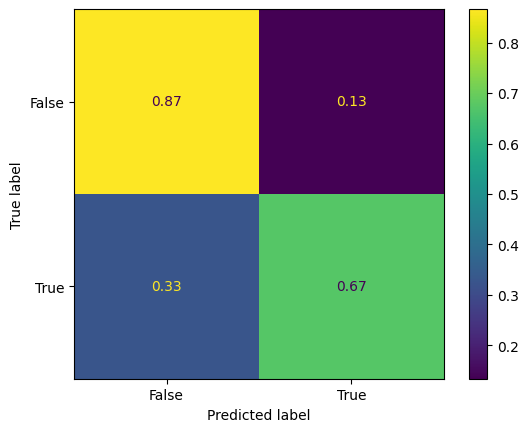

In [51]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [52]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[512],
                                                'subsample':[0.5, 0.75, 1.0]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 512, 'subsample': 0.75}
gs.best_score_ 0.858248314846529
{'mean_fit_time': array([ 6.8555923 ,  8.97421327, 10.535255  ]), 'std_fit_time': array([0.09675048, 0.01151203, 0.0160721 ]), 'mean_score_time': array([0.04433842, 0.04293704, 0.0400341 ]), 'std_score_time': array([0.00081341, 0.00073572, 0.00054812]), 'param_loss': masked_array(data=['exponential', 'exponential', 'exponential'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[512, 512, 512],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.5, 0.75, 1.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'loss': 'exponential', 'n_estimators': 512, 'subsample': 0.5}, {'loss': 'exponential', 'n_estimators': 512, 'subsample': 0.75}, {'

GradientBoostingClassifier
accuracy: 0.7949


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


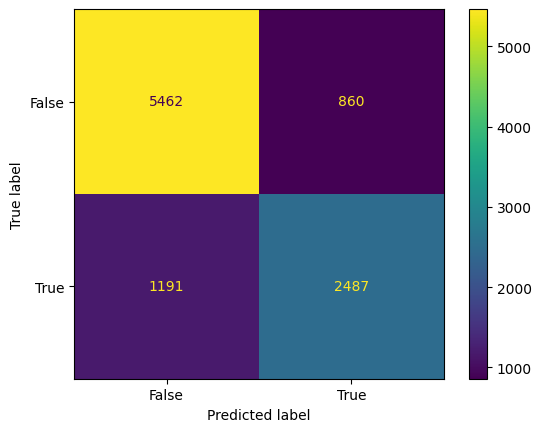

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


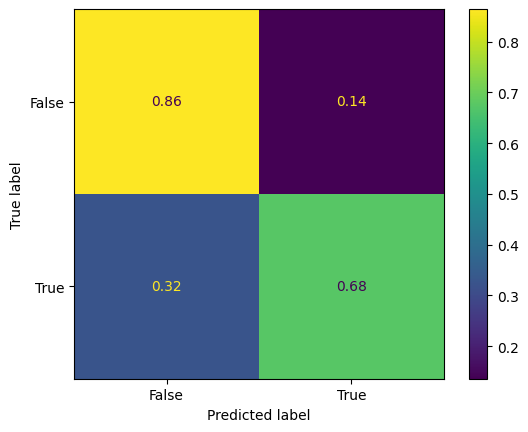

In [53]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [54]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[256],
                                                'subsample':[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 256, 'subsample': 0.75}
gs.best_score_ 0.8577940465103321
{'mean_fit_time': array([3.40872998, 3.64863605, 3.88173637, 4.10262618, 4.31370749,
       4.51498079, 4.70784669, 4.9083189 , 5.08647194, 5.27062984,
       5.27653494]), 'std_fit_time': array([0.01816947, 0.01636018, 0.01613632, 0.01919592, 0.02547177,
       0.01847509, 0.02819104, 0.02028162, 0.01629393, 0.02725843,
       0.03421848]), 'mean_score_time': array([0.02502146, 0.02492161, 0.02472134, 0.02472162, 0.02502165,
       0.02512136, 0.02472115, 0.024821  , 0.02472105, 0.02462101,
       0.02472095]), 'std_score_time': array([0.00044723, 0.00049041, 0.00040033, 0.00024528, 0.00031636,
       0.0003747 , 0.00024548, 0.00024505, 0.00051063, 0.00037448,
       0.00024544]), 'param_loss': masked_array(data=['exponential', 'exponential', 'exponential',
                   'exponential', 'exponential', 'exponential',
                   'expone

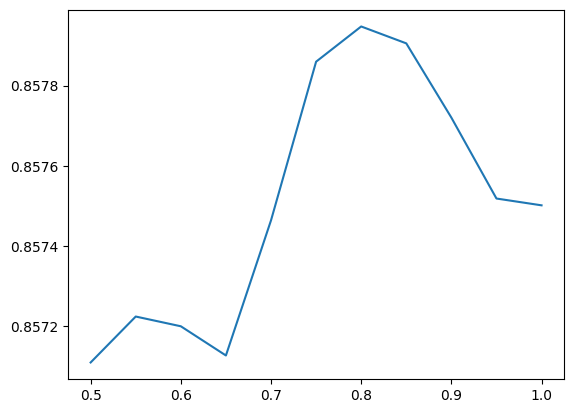

In [55]:
plt.plot( [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], np.array([0.85710811, 0.85722295, 0.8571986 , 0.85712557, 0.8574633 ,
       0.85785992, 0.85794794, 0.85790574, 0.85772013, 0.8575179 ,
       0.8575009 ]))

GradientBoostingClassifier
accuracy: 0.7973


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


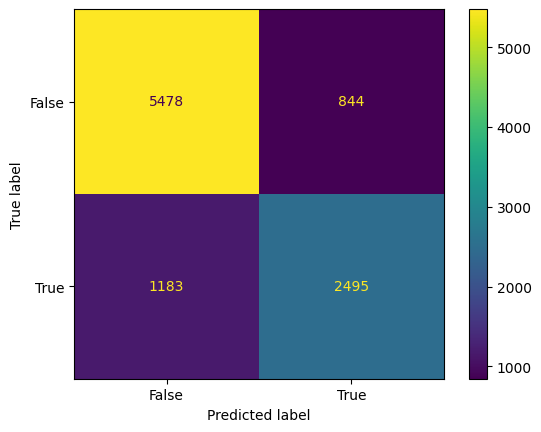

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


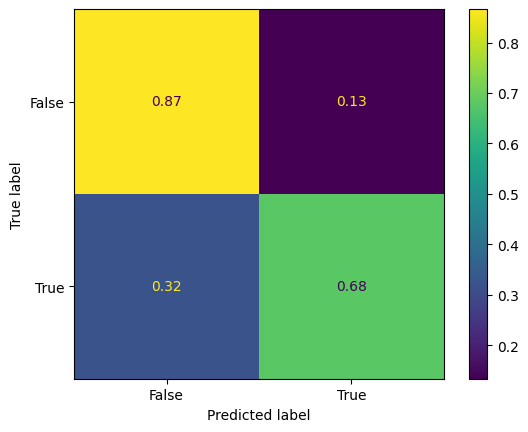

In [56]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [57]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[1000],
                                                'subsample':[0.8]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 1000, 'subsample': 0.8}
gs.best_score_ 0.8579478893671462
{'mean_fit_time': array([18.30883636]), 'std_fit_time': array([0.03300917]), 'mean_score_time': array([0.07646589]), 'std_score_time': array([0.00086099]), 'param_loss': masked_array(data=['exponential'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'loss': 'exponential', 'n_estimators': 1000, 'subsample': 0.8}], 'split0_test_score': array([0.85555824]), 'split1_test_score': array([0.86365677]), 'split2_test_score': array([0.85191763]), 'split3_test_score': array([0.86465678]), 'split4_test_score': array([0.85395003]), 'mean_test_score': array([0.85794789]), 'std

GradientBoostingClassifier
accuracy: 0.7958


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


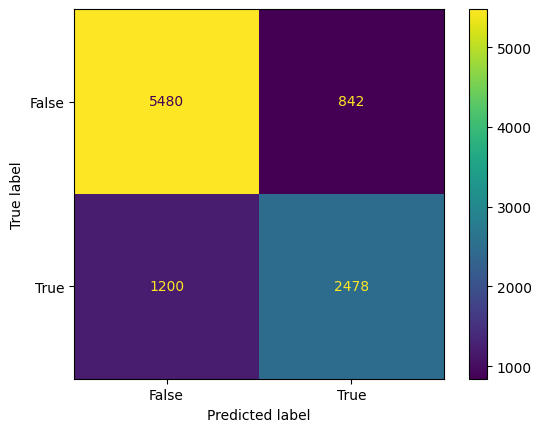

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


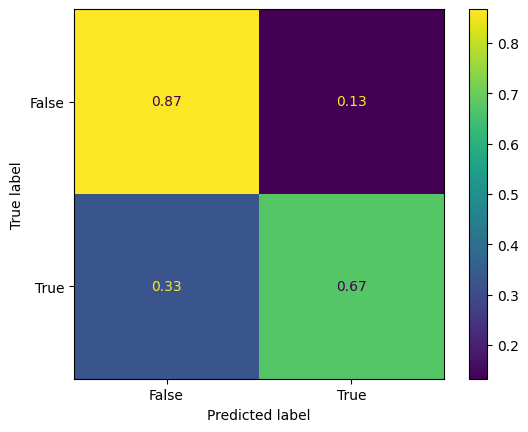

In [58]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [59]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[256],
                                                'subsample':[0.8]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 256, 'subsample': 0.8}
gs.best_score_ 0.8575098937309458
{'mean_fit_time': array([4.69653654]), 'std_fit_time': array([0.04692011]), 'mean_score_time': array([0.02482114]), 'std_score_time': array([0.00039999]), 'param_loss': masked_array(data=['exponential'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[256],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'loss': 'exponential', 'n_estimators': 256, 'subsample': 0.8}], 'split0_test_score': array([0.85532034]), 'split1_test_score': array([0.86376895]), 'split2_test_score': array([0.85098815]), 'split3_test_score': array([0.86308704]), 'split4_test_score': array([0.85438498]), 'mean_test_score': array([0.85750989]), 'std_tes

GradientBoostingClassifier
accuracy: 0.7961


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


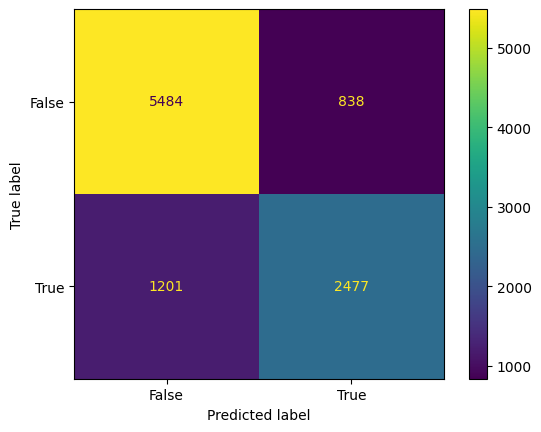

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


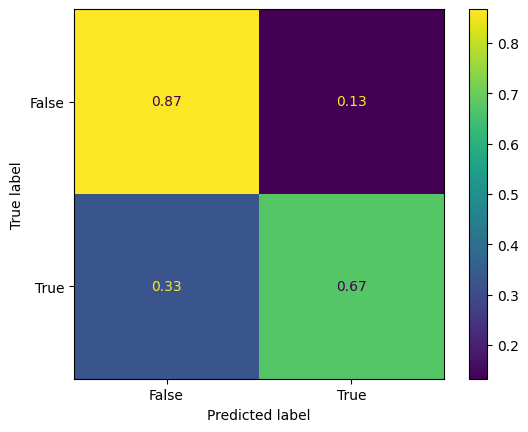

In [60]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')

In [61]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[64,128,192,256,320],
                                                'subsample':[0.8]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 320, 'subsample': 0.8}
gs.best_score_ 0.8583032615958566
{'mean_fit_time': array([1.18331676, 2.3461163 , 3.52012548, 4.71425228, 5.82590733]), 'std_fit_time': array([0.00211351, 0.00768414, 0.01650486, 0.06386096, 0.01230475]), 'mean_score_time': array([0.01070938, 0.01601415, 0.02061787, 0.02532167, 0.02892509]), 'std_score_time': array([0.00024511, 0.00031658, 0.00037432, 0.00067886, 0.0002001 ]), 'param_loss': masked_array(data=['exponential', 'exponential', 'exponential',
                   'exponential', 'exponential'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[64, 128, 192, 256, 320],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8, 0.8, 0.8, 0.8, 0.8],
             mask=[False, False, False, False

In [62]:
name='GradientBoostingClassifier'
gs = GridSearchCV(GradientBoostingClassifier(), {'loss':['exponential'], 
                                           'n_estimators':[320],
                                                'subsample':[0.8]}, cv=5, scoring='roc_auc')
gs.fit(X_train, y_train)
print(name)
print("gs.best_params_", gs.best_params_)
print("gs.best_score_", gs.best_score_)
print(gs.cv_results_)
print('\n')

GradientBoostingClassifier
gs.best_params_ {'loss': 'exponential', 'n_estimators': 320, 'subsample': 0.8}
gs.best_score_ 0.8579147713686359
{'mean_fit_time': array([5.81069436]), 'std_fit_time': array([0.01978196]), 'mean_score_time': array([0.02902508]), 'std_score_time': array([0.00044729]), 'param_loss': masked_array(data=['exponential'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[320],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'loss': 'exponential', 'n_estimators': 320, 'subsample': 0.8}], 'split0_test_score': array([0.8560198]), 'split1_test_score': array([0.86315992]), 'split2_test_score': array([0.8508857]), 'split3_test_score': array([0.86417781]), 'split4_test_score': array([0.85533062]), 'mean_test_score': array([0.85791477]), 'std_test_

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

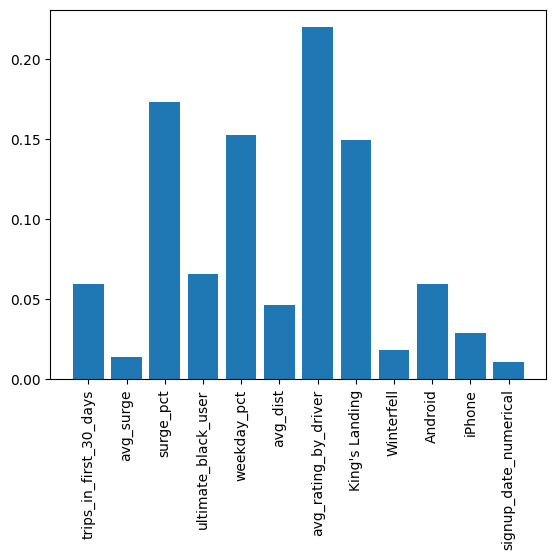

In [63]:
#gs.best_estimator_.fit(X_train, y_train)

plt.bar(x=["trips_in_first_30_days", "avg_surge", "surge_pct", "ultimate_black_user", "weekday_pct", "avg_dist", 
        "avg_rating_by_driver", "King's Landing", "Winterfell", "Android", "iPhone", "signup_date_numerical"], 
        height=gs.best_estimator_.feature_importances_)

plt.xticks(rotation=90)

GradientBoostingClassifier
accuracy: 0.7984


C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


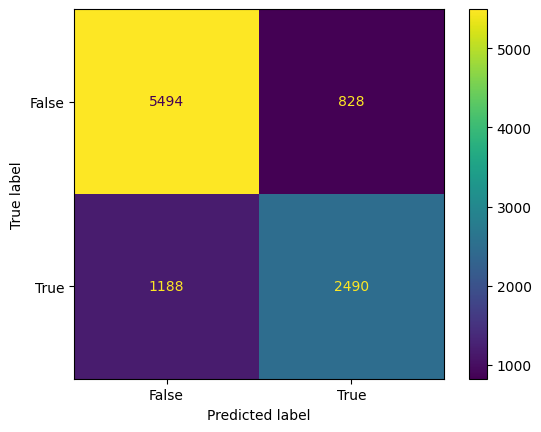

C:\Users\vinhm\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


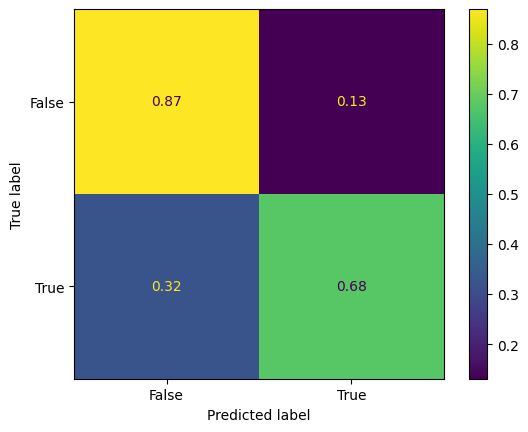

In [64]:
gs.best_estimator_.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions = gs.best_estimator_.predict(X_test)
print('accuracy:', np.mean(predictions==y_test))
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()
plot_confusion_matrix(gs.best_estimator_, X_test, y_test, normalize='true')
plt.show()
print('\n')